In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

from marketenvironment import MarketEnvironment

In [2]:
def plot_q_tables(agent):
    states = [
        "(loss;empty_market)",
        "(loss;some_jobs)",
        "(loss;full_market)",
        "(break_even;empty_market)",
        "(break_even;some_jobs)",
        "(break_even;full_market)",
        "(profit;empty_market)",
        "(profit;some_jobs)",
        "(profit;full_market)"
    ]

    actions = ["list_job", "self_processing", "bid_0.25",
               "bid_0.5", "bid_0.75", "bid_1.0"]

    plt.figure(figsize=(10, 6))
    ax = sns.heatmap(
        agent.q_table,
        annot=True,
        cmap="RdYlGn",
        center=0,
        cbar=True
    )
    ax.set_xticklabels(actions, rotation=45)
    ax.set_yticklabels(states, rotation=0)
    plt.show()


In [ ]:
def run_episode(sim_env: MarketEnvironment, max_steps: int):
    states = sim_env.reset()
    done = False
    step_count = 0
    mean_reward = 0

    while not done and step_count < max_steps:
        # print(f"--- Step {step_count} ---")
        actions = {}
        for agent in sim_env.agents.values():
            actions[agent.name] = agent.choose_action(states[agent.name])

        next_state, rewards, done, info = sim_env.step(actions)

        mean_reward += (sum(rewards.values()) - mean_reward) / (step_count + 1)

        for agent in sim_env.agents.values():
            agent.learn(
                states[agent.name], actions[agent.name],
                rewards[agent.name], next_state[agent.name]
            )

        states = next_state

        step_count += 1

    for agent in sim_env.agents.values():
        print(f"Agent {agent.name}")
        plot_q_tables(agent)



Running simulation for 87360 steps...
Agent RZ1


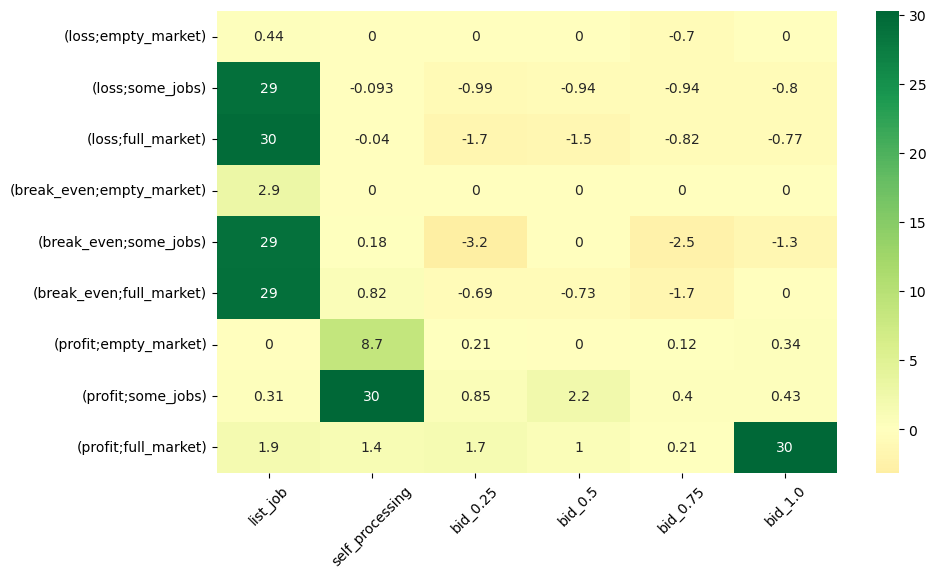

Agent RZ2


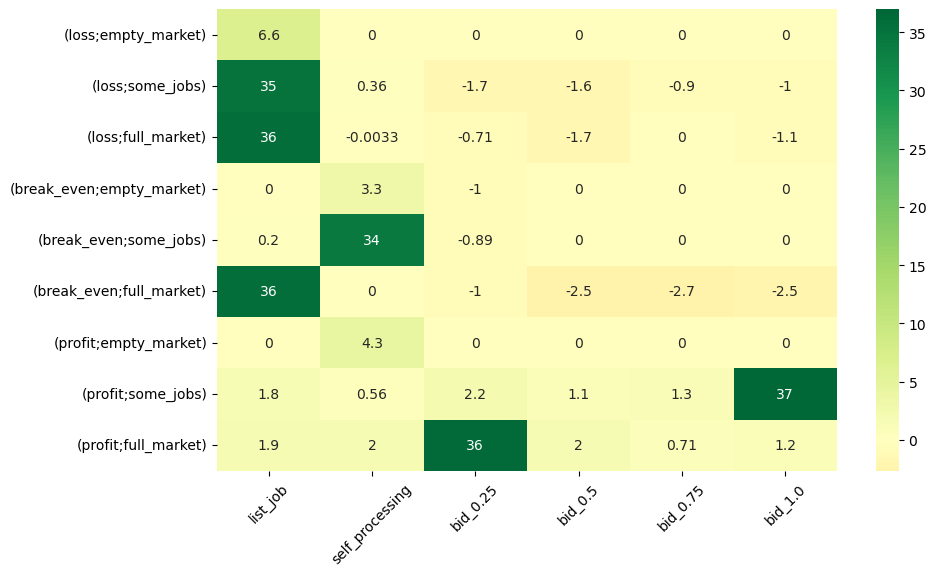

Agent RZ3


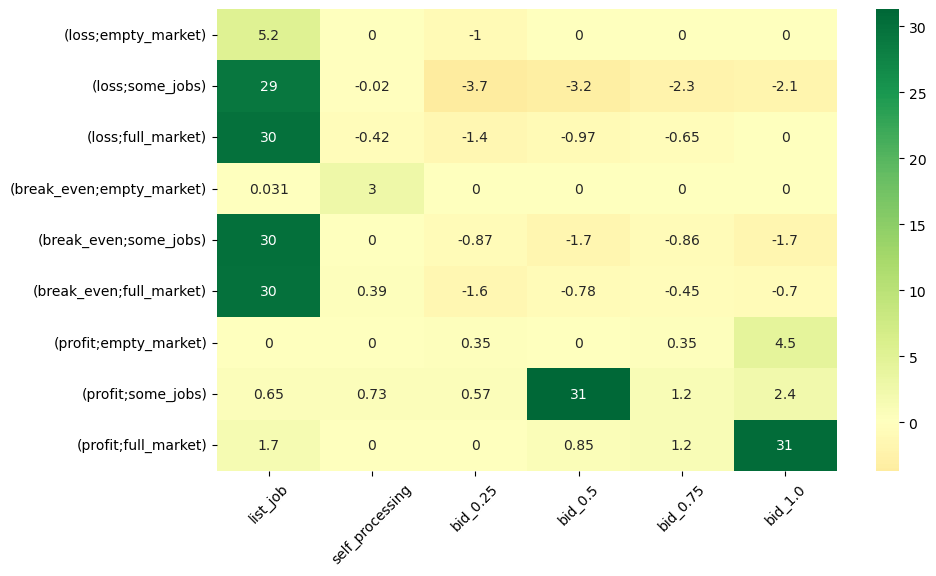

Agent RZ4


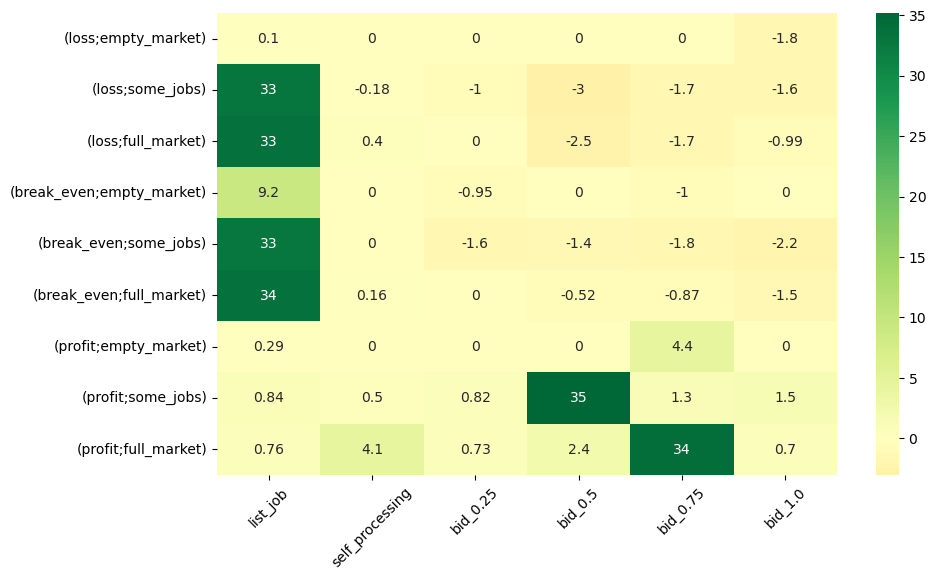

Agent RZ5


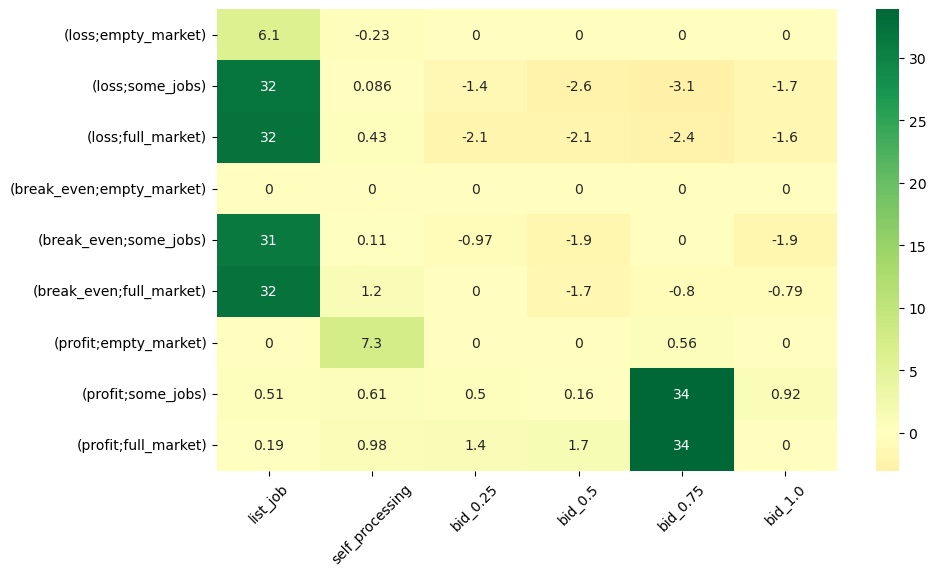

Agent RZ6


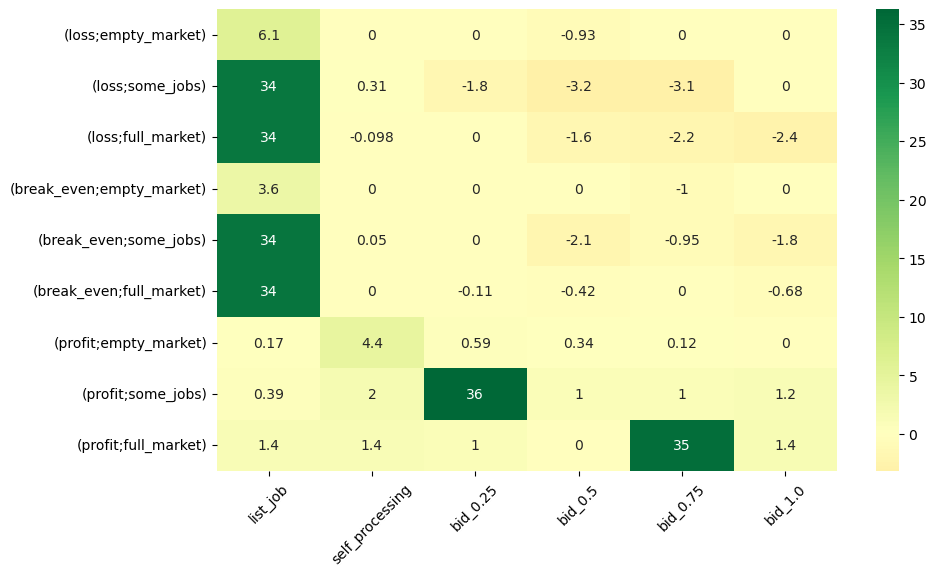

In [4]:
sim_env = MarketEnvironment()
steps = 24*7*52*10  # simulate for ten years (hourly steps)
print(f"Running simulation for {steps} steps...")
run_episode(sim_env=sim_env, max_steps=steps)